# Librerias

In [1]:
#Importemos las librerías Necesarias:
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random, time

In [2]:
from sklearn.cluster import *
from sklearn.decomposition import *

***

# Main Code

Previo a resolver el ejercicio, se ha creado un archivo csv en el que se ha eliminado la columna class y se han unido los datos de test y train separados en el xls.

In [3]:
# Empecemos cargando los datos.
df = pd.read_csv('Data_User_Modeling.csv', sep=';')
cols = df.columns
df.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [4]:
# comprobemos que la información es del tipo correcto:
df.dtypes

STG    float64
SCG    float64
STR    float64
LPR    float64
PEG    float64
dtype: object

In [5]:
# Veamos si es necesario transformar los datos:
df.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,41.889727,23.097444,1.188933,0.433821,1.281836
std,110.391330,78.372433,14.674250,0.258199,16.567310
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.370000,0.320000,0.450000,0.330000,0.400000
75%,0.640000,0.600000,0.680000,0.650000,0.660000
max,523.000000,475.000000,295.000000,1.000000,333.000000


Tras analizar los datos y el csv, se ha visto que hay datos mal imputados, datos que en vez de pertenecer a la escala 0, 1 están fuera de ella por haber anotado mal el dato.

In [6]:
# adecuemos estos datos por tanto:
for i in df.index:
    for name in cols:
        if df[name][i] > 1:
            df[name][i] /= 1000
df.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.433821,0.456360
std,0.212018,0.215531,0.246684,0.258199,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,1.000000,0.990000


Una vez adecuados los datos, sabemos y vemos varias cosas:
   1. No falta información.
   2. Los datos están escalados.

**Empecemos implementando el método de clústering particional:**

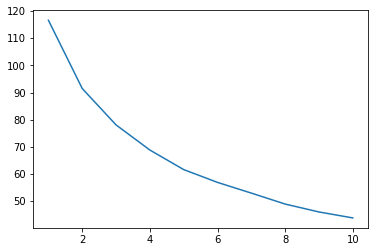

In [7]:
# implementemos el método del codo:
part = list()
for i in range(10):
    model = KMeans(n_clusters=i+1)
    model.fit(df)
    part.append(model.inertia_)
plt.plot(range(1,11), part)

No resulta claramente evidente pero si aplicamos la técnica del codo en el gráfico obtenido empleando el método de clústering particional vemos que el numero optimo de clases estaría mas o menos en 4, para justificar esta respuesta se mostrará un scatter plot empleando n_cluster =4

Para ayudarnos a esta tarea emplearemos el modulo PCA de sklearn.


In [8]:
# Preparemos la información:
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_array, columns=['X', 'Y'])

In [9]:
# Realicemos la predicción empleando la información adquirida:
model = KMeans(n_clusters=4)
pred = model.fit_predict(df)

In [10]:
# Generemos el df que emplearemos para mostrar los datos:
scttr = pd.concat([pca_df, pd.DataFrame(pred, columns=['pred'])], axis=1)
scttr.head()

,X,Y,pred
0,0.840557,-0.352337,3
1,0.007671,-0.442343,2
2,0.481065,-0.231651,3
3,0.362882,0.163965,1
4,0.389477,0.470686,1


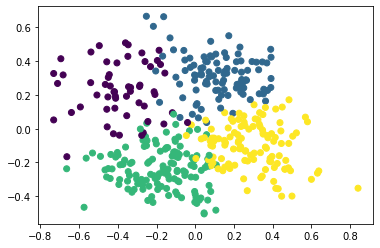

In [12]:
# Partiendo de esta información, dibujemos el Scatter Plot:
plt.scatter(x=scttr.X, y=scttr.Y, c=scttr.pred)
plt.show()

**Pasemos al método Aglomerativo Jerárquico:**

Para este método, asumiremos que n = 4 y mostraremos el dendograma:

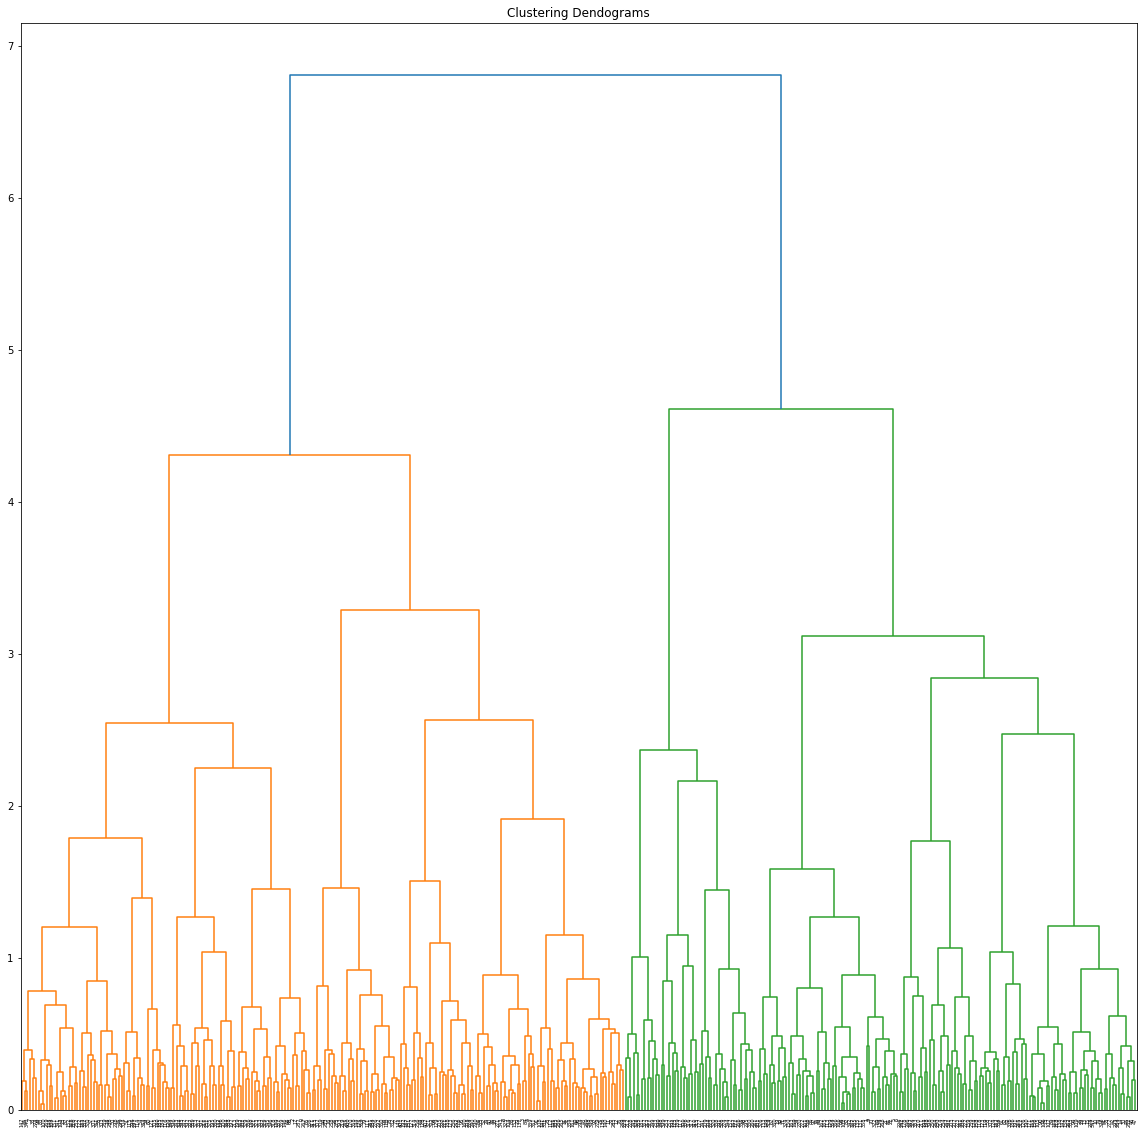

In [16]:
import scipy.cluster.hierarchy as dnd
# implementemos el modelo:
plt.figure(figsize=(20,20))
plt.title("Clustering Dendograms")
dend = dnd.dendrogram(dnd.linkage(df, method='ward'))

En el dendograma se aprecia con bastante claridad la presencia de 4 clusters bien definidos.

***

## Notas:

> Nota 1

## Bibliografia:

   * Stack Overflow: https://stackoverflow.com
   * Elemento bibliografico 2

### Autor

   - **Name:** Elidas
   - **Email:** pyro.elidas@gmail.com
   - **Python version:** 3.9.1
   - **Date:** ${DATE}